# Voice Quality Analyzer

### Импортируем нужные модули

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from pydub.generators import Sine
from pydub import AudioSegment

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Создаем две синусоиды з частотами 300Hz и 600Hz

In [3]:
sine_wave_300 = Sine(freq=300)
sine_wave_600 = Sine(freq=600)

### Можем прослушать полученный "звук"

#### Волна с частотой 300Hz

In [4]:
audio_segment_sine_wave_300 = sine_wave_300.to_audio_segment(duration=1000.0*5)
sine_wave_300.to_audio_segment(duration=1000.0*5)

#### Волна с частотой 600Hz

In [5]:
audio_segment_sine_wave_600 = sine_wave_600.to_audio_segment(duration=1000.0*5)
sine_wave_600.to_audio_segment(duration=1000.0*5)

### Реализуем функцию для генерации комбинации двух синусоид (а так же общий случай для множества входных синусоид)

In [6]:
def gen_comb_of_two_sine(first_sine=Sine(freq=300), second_sine=Sine(freq=600), first_duration=1, second_duration=1, export_in_wav=False):
    """
    Parameters:
        first_sine: pydub.generators.Sine, default: Sine(freq=300)
            This is first sine wave.
            
        second_sine: pydub.generators.Sine, default: Sine(freq=600)
            This is first sine wave.
            
        first_duration: int, float, default: 1
            Audio duration in seconds.
            
        second_duration: int, float, default: 1
            Audio duration in seconds.
            
        export_in_wav: bool, , default: False
            Specifies if a combination_of_two_sine should be
            saved in current folder with name "combination_of_two_sine.wav".
            
    Returns:
        combination_of_two_sine: pydub.audio_segment.AudioSegment
            This is combination of two sine wave.
            
    """
    
    
    audio_segment_first = first_sine.to_audio_segment(duration=np.abs(1000.0 * first_duration))
    audio_segment_second = second_sine.to_audio_segment(duration=np.abs(1000.0 * second_duration))
    
    combination_of_two_sine = audio_segment_first + audio_segment_second
    
    if export_in_wav:
        combination_of_two_sine.export('combination_of_two_sine.wav', format='wav')
        
    return combination_of_two_sine

In [7]:
def gen_comb_of_sine(*args, export_in_wav=False):
    """
    Parameters:
        *args containes tuples pair like (Sine, duration).
        
        Sine: pydub.generators.Sine
            This is one of sine waves.
            
        duration: int, float
            This is duration of current sine wave.
            
        export_in_wav: bool, default: False
        Specifies if a combination_of_two_sine should be
            saved in current folder with name "combination_of_two_sine.wav".
            
    Returns:
        combination_of_sines: pydub.audio_segment.AudioSegment
            This is combination of sine waves.
            
    """
    combination_of_sines = Sine(freq=0).to_audio_segment(duration=0)
    for i in args:
        combination_of_sines += i[0].to_audio_segment(duration=np.abs(1000.0 * i[1]))
        
    if export_in_wav:
        combination_of_sines.export('combination_of_sines.wav', format='wav')
        
    return combination_of_sines

#### Результат роботы функции для генерации комбинации двух волн

In [8]:
gen_comb_of_two_sine(export_in_wav=True)

#### Результат роботы функции для генерации комбинации множества волн

In [9]:
gen_comb_of_sine((Sine(300), 1), (Sine(600), 1), (Sine(300), 1), export_in_wav=True)

In [10]:
# наложение двух волн
# sine_wave_300.to_audio_segment(duration=1000*4).overlay(sine_wave_600.to_audio_segment(duration=1000*4))

In [14]:
# plt.plot(Sine(300).to_audio_segment(duration=10.0, volume=-50).get_array_of_samples())

In [13]:
# type(Sine(300).to_audio_segment(duration=10.0).get_array_of_samples())

In [12]:
# np.array(Sine(300).to_audio_segment(duration=10.0, volume=0).get_array_of_samples())

In [59]:
audio_book_mp3 = AudioSegment.from_file("audiobook.mp3", format='mp3')

In [60]:
def voice_signal_generator(audio, duration=1000*2*60, filename='output', fmt='wav'):
    audio_slice = None
    if len(audio) < duration:
        audio_slice = audio
    else:
        bound = np.random.randint(low=duration, high=len(audio)-duration-1)
        audio_slice = audio[bound:bound+low]
    audio_slice.export(filename + '.' + fmt, format=fmt)

In [61]:
voice_signal_generator(audio_book_mp3)

In [62]:
audio_book_output = AudioSegment.from_file("output.wav", format='wav')

In [63]:
audio_book_output

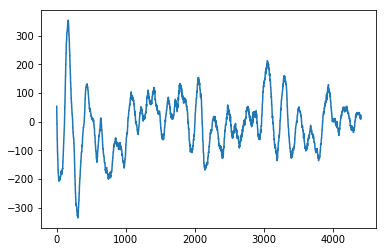

In [111]:
plt.plot(audio_book_output[100:150].get_array_of_samples())

In [140]:
def signal_transformer(audio, filename='output_transform', bitrate='64k'):
    audio.export('Signal transform buf file/to_mp3.mp3', format='mp3', bitrate=bitrate)
    to_wav = AudioSegment.from_file('Signal transform buf file/to_mp3.mp3', format='mp3')
    to_wav.export(filename + '.wav', format='wav')

In [141]:
signal_transformer(audio_book_output)

In [142]:
audio_book_output_transform = AudioSegment.from_file("output_transform.wav", format='wav')

In [143]:
audio_book_output_transform

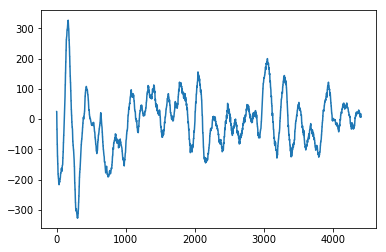

In [144]:
plt.plot(audio_book_output_transform[100:150].get_array_of_samples())

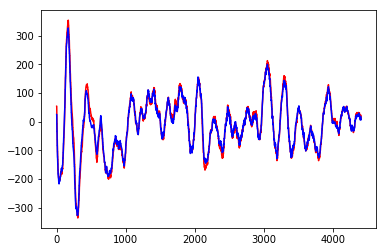

In [145]:
plt.plot(audio_book_output[100:150].get_array_of_samples(), color='red')
plt.plot(audio_book_output_transform[100:150].get_array_of_samples(), color='blue')